<a href="https://colab.research.google.com/github/TranQuocViet236/Somethings_on_Colab/blob/main/Data_Pre_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive

In [ ]:

drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
data_df = pd.read_csv('/content/gdrive/MyDrive/ML/Scikit_learn/Data.csv')

In [ ]:
data_df.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    10 non-null     object 
 1   Age        9 non-null      float64
 2   Salary     9 non-null      float64
 3   Purchased  10 non-null     object 
dtypes: float64(2), object(2)
memory usage: 448.0+ bytes


In [ ]:
for column in data_df.columns:
  print(column)

Country
Age
Salary
Purchased


In [ ]:
for column in data_df.columns:
  missing_data = data_df[column].isna().sum()
  missing_percent = missing_data/len(data_df)*100
  print(f'Column {column}: has {missing_percent}% missing data')

Column Country: has 0.0% missing data
Column Age: has 10.0% missing data
Column Salary: has 10.0% missing data
Column Purchased: has 0.0% missing data


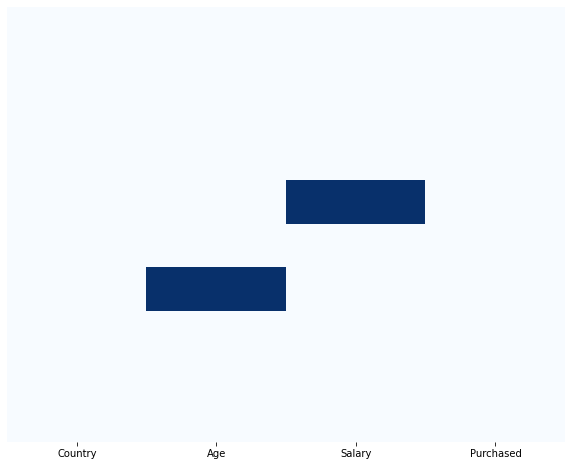

In [ ]:
fig, ax = plt.subplots(figsize = (10,8))
sns.heatmap(data_df.isna(), cmap='Blues', cbar=False, yticklabels= False)

In [ ]:
x = data_df.iloc[:,:-1].values

In [ ]:
x

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, nan],
       ['France', 35.0, 58000.0],
       ['Spain', nan, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [ ]:
y = data_df.iloc[:,-1].values

In [ ]:
from sklearn.impute import SimpleImputer
#create an instancee of class_simpleImputer: np.nan is the empty value in the dataset
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

imputer.fit(x[:,1:3])
x[:,1:3]= imputer.transform(x[:,1:3])

In [ ]:
x

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, 63777.77777777778],
       ['France', 35.0, 58000.0],
       ['Spain', 38.77777777777778, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [ ]:
#Encode
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
Ohc = OneHotEncoder()
ct = ColumnTransformer(transformers =[('encoder', Ohc,[0])], remainder='passthrough')


In [ ]:
x = np.array(ct.fit_transform(x))

In [ ]:
x

array([[1.0, 0.0, 0.0, 44.0, 72000.0],
       [0.0, 0.0, 1.0, 27.0, 48000.0],
       [0.0, 1.0, 0.0, 30.0, 54000.0],
       [0.0, 0.0, 1.0, 38.0, 61000.0],
       [0.0, 1.0, 0.0, 40.0, 63777.77777777778],
       [1.0, 0.0, 0.0, 35.0, 58000.0],
       [0.0, 0.0, 1.0, 38.77777777777778, 52000.0],
       [1.0, 0.0, 0.0, 48.0, 79000.0],
       [0.0, 1.0, 0.0, 50.0, 83000.0],
       [1.0, 0.0, 0.0, 37.0, 67000.0]], dtype=object)

In [ ]:
#Encode Dependent Variable (y)

In [ ]:
y

array(['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes'],
      dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
y

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

In [ ]:
#Split the dataset 

In [ ]:
from sklearn.model_selection import train_test_split
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(x,y,  test_size =0.2)


In [ ]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:,3:]= sc.fit_transform(X_train[:,3:])

In [ ]:
X_train

array([[1.0, 0.0, 0.0, -0.7529426005471072, -0.6260377781240918],
       [1.0, 0.0, 0.0, 1.008453807952985, 1.0130429500553495],
       [1.0, 0.0, 0.0, 1.7912966561752484, 1.8325833141450703],
       [0.0, 1.0, 0.0, -1.7314961608249362, -1.0943465576039322],
       [1.0, 0.0, 0.0, -0.3615211764359756, 0.42765697570554906],
       [0.0, 1.0, 0.0, 0.22561095973072184, 0.05040823668012247],
       [0.0, 0.0, 1.0, -0.16581046438040975, -0.27480619351421154],
       [0.0, 0.0, 1.0, -0.013591021670525094, -1.3285009473438525]],
      dtype=object)

In [ ]:
X_test[:,3:]= sc.transform(X_test[:,3:])
X_test

array([[0.0, 1.0, 0.0, 2.1827180802863797, 2.3008920936249107],
       [0.0, 0.0, 1.0, -2.3186282969916334, -1.7968097268236927]],
      dtype=object)